In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
from utils.predictiveNet import PredictiveNet
from utils.agent import RandomActionAgent
import itertools
import torch
import random
from utils.env import make_env
from utils.general import saveFig
import matplotlib.pyplot as plt


from analysis.OfflineTrajectoryAnalysis import OfflineTrajectoryAnalysis
from analysis.OfflineActivityAnalysis import SpontaneousActivityAnalysis
from analysis.representationalGeometryAnalysis import representationalGeometryAnalysis

In [3]:
savefolder = 'Figures/S9_ActionEncoding/'

In [7]:
#Example Net
actions = ['Onehot','SpeedHD','Velocities']
netname = 'thRNN_5win'
exseed = 104
netfolder = '/maskedk_panel/'
predictiveNet = {}
for aidx,act in enumerate(actions):
    predictiveNet[act] = PredictiveNet.loadNet(netfolder+netname+'-'+act+'-s'+str(exseed))

Net Loaded from pathname
Net Loaded from pathname
Net Loaded from pathname


Running WAKE


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/representationalGeometryAnalysis.py:313: RuntimeWarning: invalid value encountered in divide
  hist2 = hist2/np.sum(hist2,axis=0)
/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


Running SLEEP
Fitting Isomap


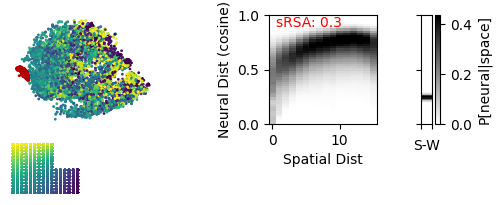

Running WAKE


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/representationalGeometryAnalysis.py:313: RuntimeWarning: invalid value encountered in divide
  hist2 = hist2/np.sum(hist2,axis=0)
/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


Running SLEEP
Fitting Isomap


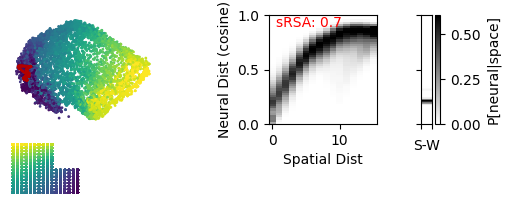

Running WAKE


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/representationalGeometryAnalysis.py:313: RuntimeWarning: invalid value encountered in divide
  hist2 = hist2/np.sum(hist2,axis=0)
/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


Running SLEEP
Fitting Isomap


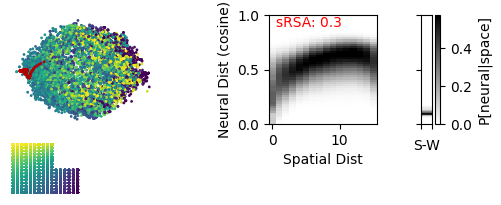

In [10]:
sleepnoise = 0.1
isomap_neighbors = 15
for aidx,act in enumerate(actions):
    RGA = representationalGeometryAnalysis(predictiveNet[act],
                                                noisemag = 0, noisestd=sleepnoise, 
                                            withIsomap=True, n_neighbors = isomap_neighbors)
    RGA.WakeSleepFigure(act,savefolder)

Getting Tuning Curves for Input Units


/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/pynapple/process/tuning_curves.py:340: RuntimeWarning: invalid value encountered in divide
  fxfr = fx / fr
/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/pynapple/process/tuning_curves.py:351: RuntimeWarning: invalid value encountered in divide
  SI = SI / fr[:, 0, 0]


Running WAKE
Calculating EV_s
Calculating EV_s for input control


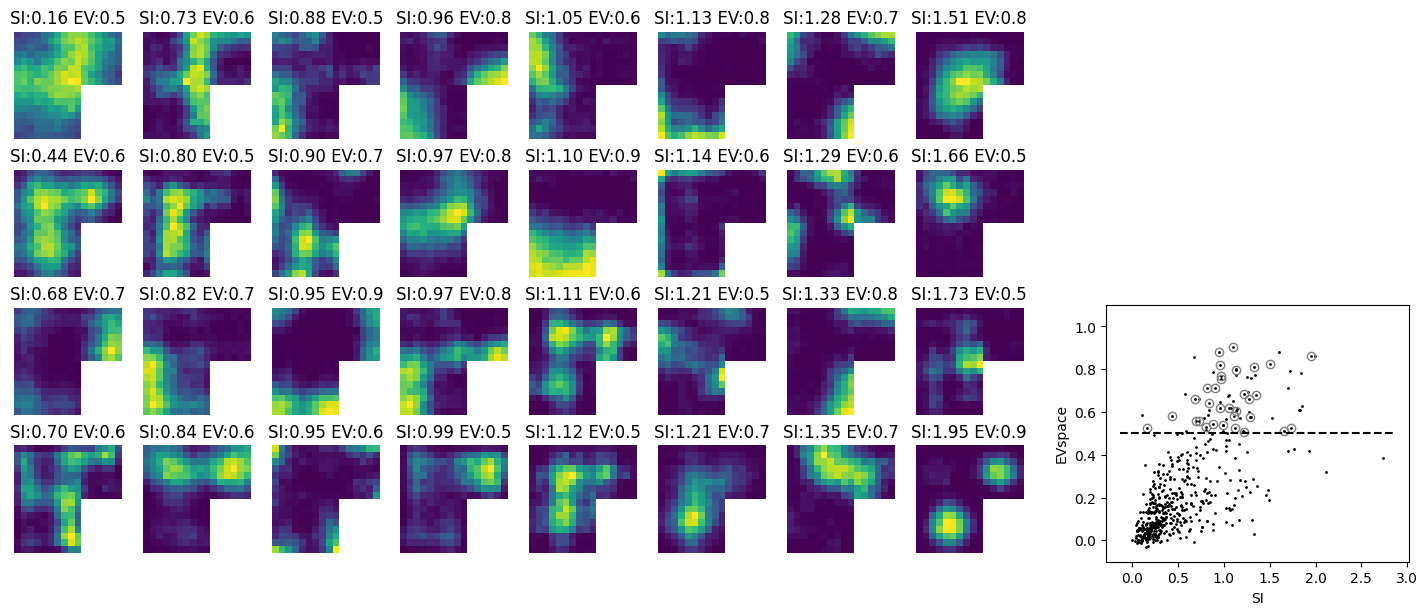

Getting Tuning Curves for Input Units


/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/pynapple/process/tuning_curves.py:340: RuntimeWarning: invalid value encountered in divide
  fxfr = fx / fr
/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/pynapple/process/tuning_curves.py:351: RuntimeWarning: invalid value encountered in divide
  SI = SI / fr[:, 0, 0]


Running WAKE
Calculating EV_s
Calculating EV_s for input control


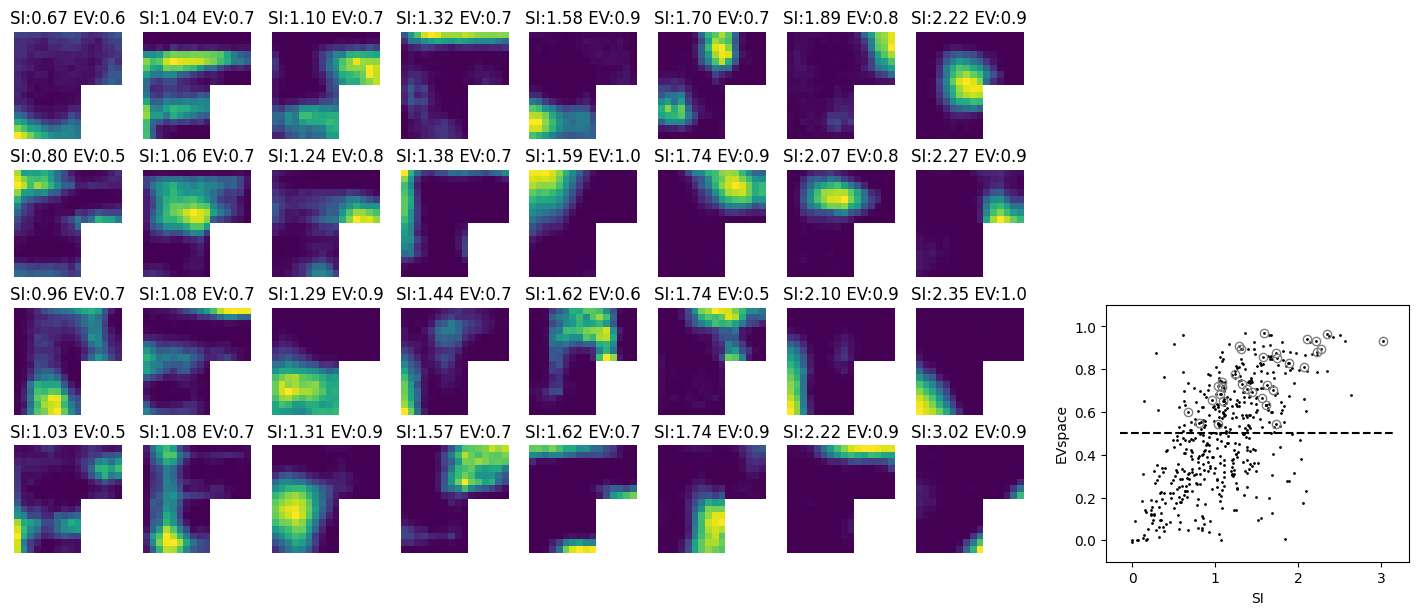

Getting Tuning Curves for Input Units


/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/pynapple/process/tuning_curves.py:340: RuntimeWarning: invalid value encountered in divide
  fxfr = fx / fr
/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/pynapple/process/tuning_curves.py:351: RuntimeWarning: invalid value encountered in divide
  SI = SI / fr[:, 0, 0]


Running WAKE
Calculating EV_s
Calculating EV_s for input control


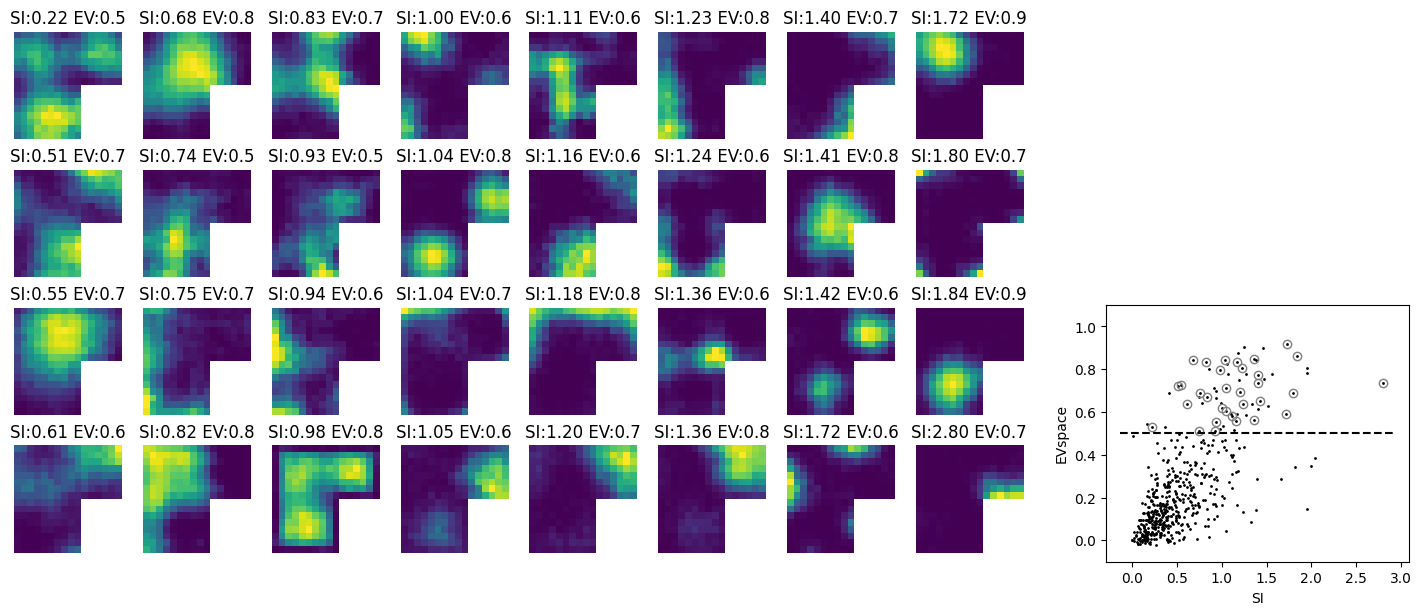

In [12]:
from analysis.SpatialTuningAnalysis import SpatialTuningAnalysis

for aidx,act in enumerate(actions):
    STA = SpatialTuningAnalysis(predictiveNet[act],
                                   inputControl=True, untrainedControl=False)
    STA.TCExamplesFigure(netname=act,savefolder=savefolder)